In [15]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import gensim.models.word2vec as w2v
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import os

In [16]:
model = w2v.Word2Vec.load(os.path.join("../model","model.w2v"))

In [17]:
pca = PCA(n_components=2)
all_word_vectors = model.wv.syn0
all_word_vectors_2d = pca.fit_transform(all_word_vectors)

C:\Users\0x6f736f646f\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


In [18]:
data  = pd.DataFrame(
    [
        (word,coords[0],coords[1])
        for word,coords in [
            (word,all_word_vectors_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
        
    ],
    columns=["word", "x", "y"]
    )

data.head()

,word,x,y
0,ink,-0.068961,0.004563
1,helps,-0.068197,0.005066
2,drive,0.121204,-0.024501
3,democracy,0.058697,0.006547
4,in,1.137650,-0.024613


In [19]:
sns.set_context("poster")

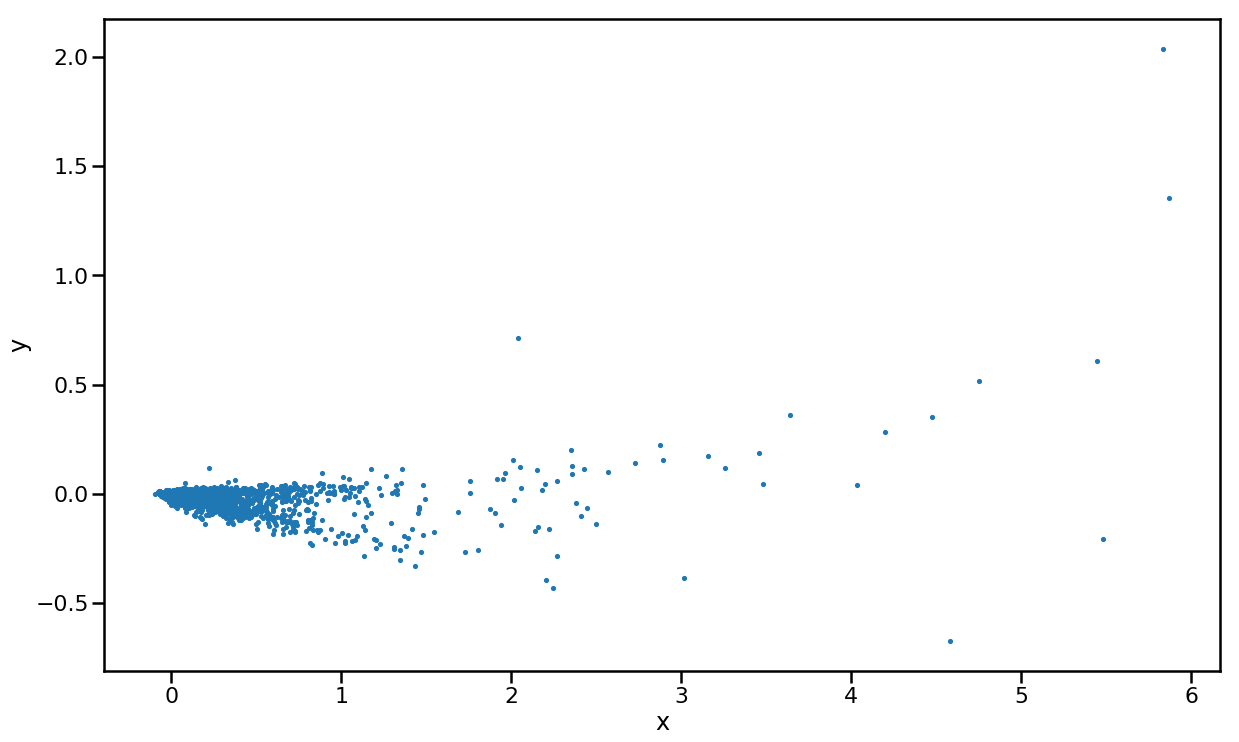

In [20]:
data.plot.scatter("x","y",s=10,figsize=(20,12))

In [21]:
def plot_region(x_bounds,y_bounds):
    slice = data[
        (x_bounds[0] <= data.x) &
        (data.x <= x_bounds[1]) & 
        (y_bounds[0] <= data.y) &
        (data.y <= y_bounds[1])
    ]
#     print slice
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

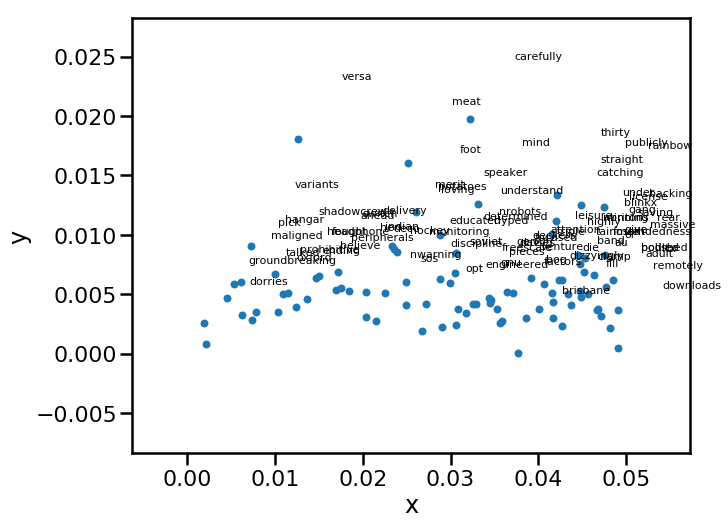

In [22]:
plot_region((0,0.05),(0,0.2))

In [23]:
model.most_similar("school")

C:\Users\0x6f736f646f\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('webster', 0.9987143278121948),
 ('form', 0.9984598159790039),
 ('eye', 0.9984111785888672),
 ('wide', 0.9983794689178467),
 ('well', 0.9982560873031616),
 ('click', 0.9982531070709229),
 ('run', 0.9982507228851318),
 ('top', 0.9982351660728455),
 ('dec', 0.9982215166091919),
 ('no', 0.9982158541679382)]

In [24]:
model.most_similar("economy")

C:\Users\0x6f736f646f\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('sequential', 0.1654512882232666),
 ('dimensions', 0.1634312868118286),
 ('violence', 0.1600334197282791),
 ('specifically', 0.14723090827465057),
 ('numerique', 0.14581094682216644),
 ('rspca', 0.14497043192386627),
 ('instantly', 0.14244064688682556),
 ('colours', 0.13997882604599),
 ('organised', 0.1390979290008545),
 ('panlogic', 0.13829399645328522)]

In [13]:
def nearest_similar_cosine(s1,e1,e2):
    similarities = model.most_similar_cosmul(
    positive = [e2,s1],
    negative = [e1])
    
    s2 = similarities[0][0]
    print("%s is related to %s as %s is related to %s"%(s1,e1,s2,e2))
    return(s2)

In [14]:
nearest_similar_cosine("economy", "couples", "potter")

economy is related to couples as affects is related to potter


C:\Users\0x6f736f646f\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'affects'